## MULTIPLE LR FROM SCRATCH

In [1]:
import numpy as np
from sklearn.datasets import load_diabetes

In [2]:
X,y = load_diabetes(return_X_y=True)

In [3]:
X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]], shape=(442, 10))

In [6]:
X.shape

(442, 10)

In [4]:
y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [5]:
y.shape

(442,)

### USING SKLEARN LR

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [9]:
print(X_train.shape)
print(X_test.shape)

(353, 10)
(89, 10)


In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
reg = LinearRegression()

In [27]:
reg.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [13]:
y_pred = reg.predict(X_test)

In [14]:
from sklearn.metrics import r2_score

In [15]:
r2_score(y_test,y_pred)

0.4399338661568968

In [16]:
reg.coef_

array([  -9.15865318, -205.45432163,  516.69374454,  340.61999905,
       -895.5520019 ,  561.22067904,  153.89310954,  126.73139688,
        861.12700152,   52.42112238])

In [17]:
reg.intercept_

np.float64(151.88331005254167)

## Making our own Linear Regression Class

In [18]:
class MeraLR:
    
    def __init__(self):
        self.coef_ = None
        self.intercept_ = None
        
    def fit(self,X_train,y_train):
        X_train = np.insert(X_train,0,1,axis=1)
        
        # calcuate the coeffs
        betas = np.linalg.inv(np.dot(X_train.T,X_train)).dot(X_train.T).dot(y_train)
        self.intercept_ = betas[0]
        self.coef_ = betas[1:]
    
    def predict(self,X_test):
        y_pred = np.dot(X_test,self.coef_) + self.intercept_
        return y_pred
        
    

In [19]:
lr = MeraLR()

In [20]:
lr.fit(X_train,y_train)

In [21]:
X_train.shape

(353, 10)

In [22]:
np.insert(X_train,0,1,axis=1).shape

(353, 11)

In [23]:
y_pred = lr.predict(X_test)

In [24]:
r2_score(y_test,y_pred)

0.43993386615689645

In [25]:
lr.coef_

array([  -9.15865318, -205.45432163,  516.69374454,  340.61999905,
       -895.5520019 ,  561.22067904,  153.89310954,  126.73139688,
        861.12700152,   52.42112238])

In [26]:
lr.intercept_

np.float64(151.88331005254167)

# GRADIENT DESCENT

In [28]:
from sklearn.datasets import make_regression
import numpy as np

In [29]:
X,y = make_regression(n_samples=4, n_features=1, n_informative=1, n_targets=1,noise=80,random_state=13)

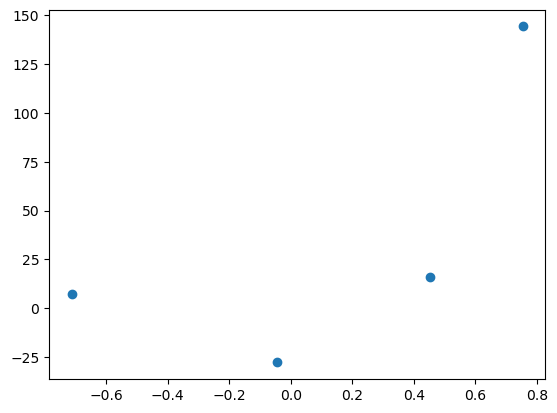

In [30]:
import matplotlib.pyplot as plt
plt.scatter(X,y)

In [31]:
# Lets apply OLS
from sklearn.linear_model import LinearRegression

In [32]:
reg = LinearRegression()
reg.fit(X,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [33]:
reg.coef_

array([78.35063668])

In [34]:
reg.intercept_

np.float64(26.15963284313262)

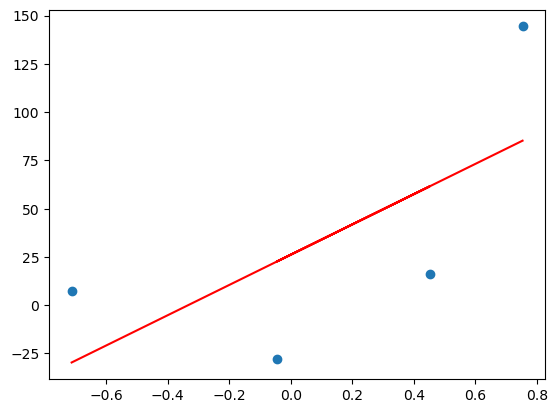

In [35]:
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red')

In [37]:
# Lets apply Gradient Descent assuming slope is constant m = 78.35
# and let's assume the starting value for intercept b = 0
y_pred = ((78.35 * X) + 0).reshape(4)

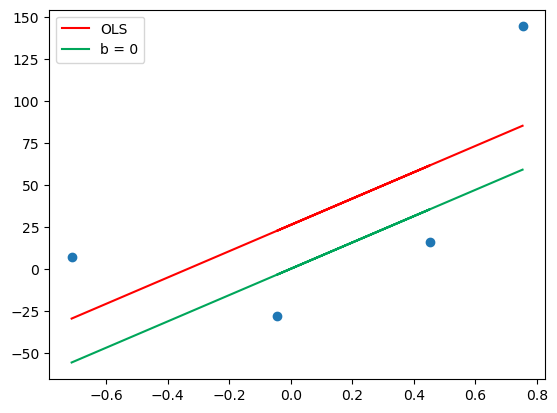

In [38]:
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred,color='#00a65a',label='b = 0')
plt.legend()
plt.show()

In [39]:
m = 78.35
b = 0

loss_slope = -2 * np.sum(y - m*X.ravel() - b)
loss_slope

np.float64(-209.27763408209216)

In [40]:
# Lets take learning rate = 0.1
lr = 0.1

step_size = loss_slope*lr
step_size

np.float64(-20.927763408209216)

In [41]:
# Calculating the new intercept
b = b - step_size
b

np.float64(20.927763408209216)

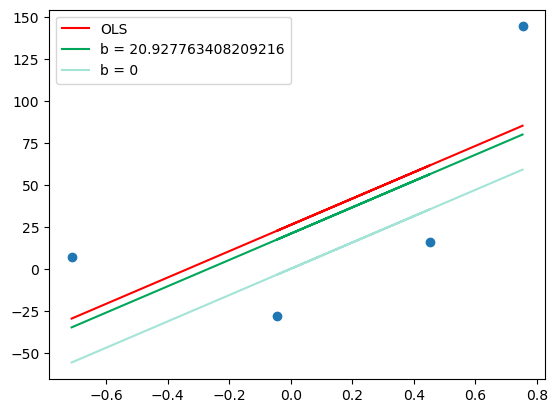

In [43]:
y_pred1 = ((78.35 * X) + b).reshape(4)

plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred1,color='#00a65a',label='b = {}'.format(b))
plt.plot(X,y_pred,color='#A3E4D7',label='b = 0')
plt.legend()
plt.show()

In [44]:
# Iteration 2
loss_slope = -2 * np.sum(y - m*X.ravel() - b)
loss_slope

np.float64(-41.85552681641843)

In [45]:
step_size = loss_slope*lr
step_size

np.float64(-4.185552681641844)

In [46]:
b = b - step_size
b

np.float64(25.11331608985106)

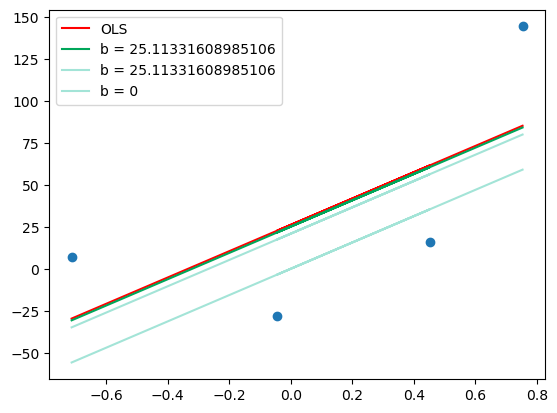

In [47]:
y_pred2 = ((78.35 * X) + b).reshape(4)

plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred2,color='#00a65a',label='b = {}'.format(b))
plt.plot(X,y_pred1,color='#A3E4D7',label='b = {}'.format(b))
plt.plot(X,y_pred,color='#A3E4D7',label='b = 0')
plt.legend()
plt.show()

In [48]:
# Iteration 3
loss_slope = -2 * np.sum(y - m*X.ravel() - b)
loss_slope

np.float64(-8.371105363283675)

In [49]:
step_size = loss_slope*lr
step_size

np.float64(-0.8371105363283675)

In [50]:
b = b - step_size
b

np.float64(25.95042662617943)

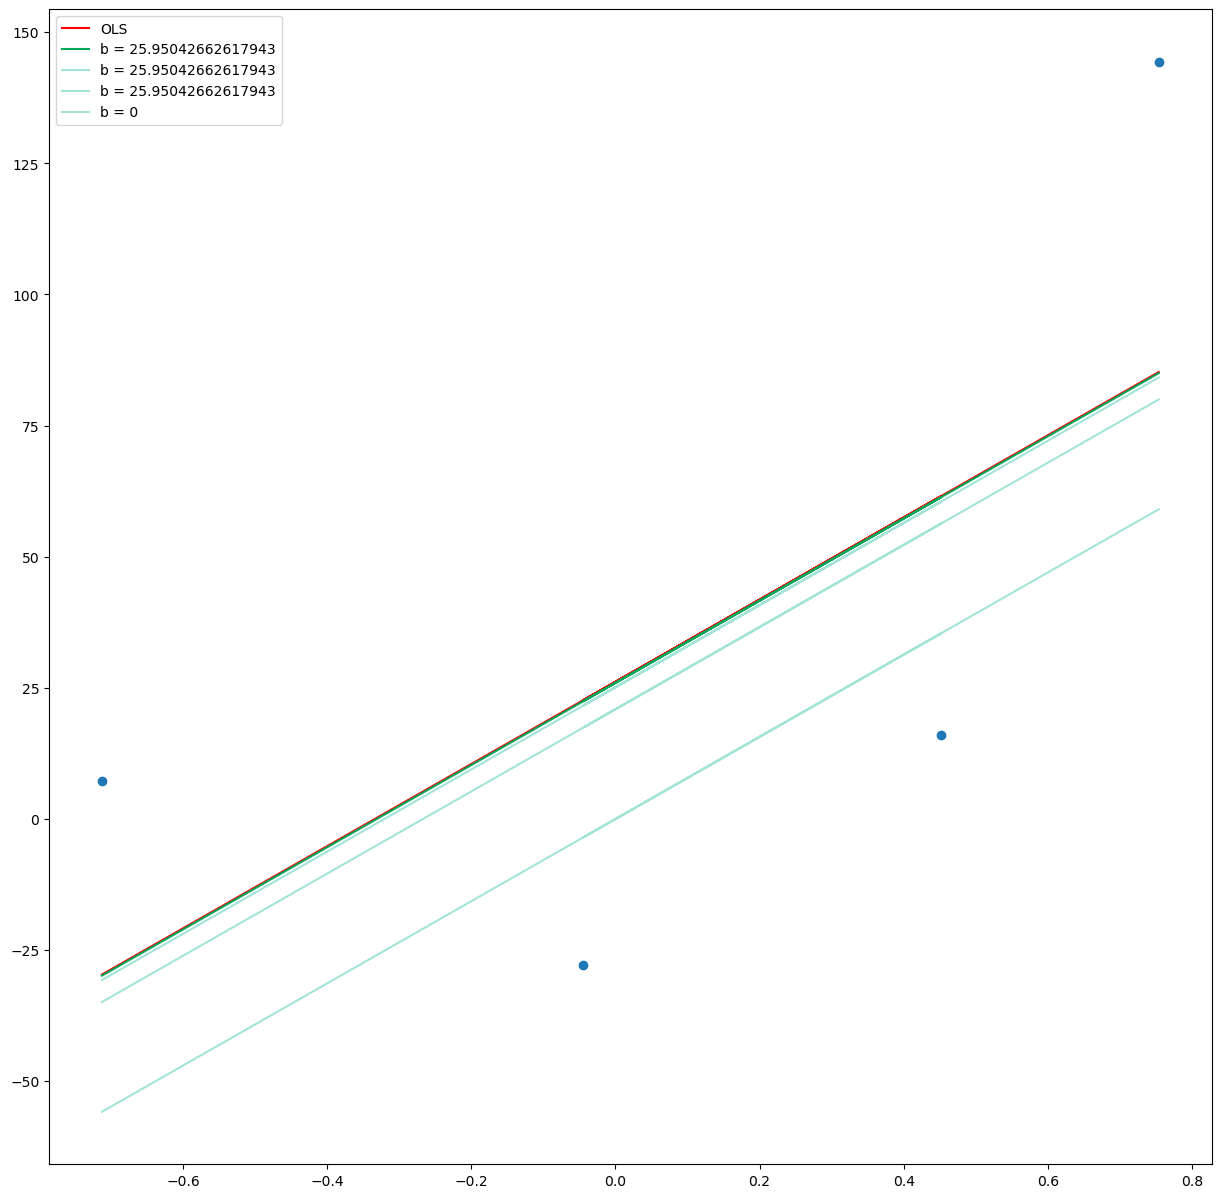

In [51]:
y_pred3 = ((78.35 * X) + b).reshape(4)

plt.figure(figsize=(15,15))
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred3,color='#00a65a',label='b = {}'.format(b))
plt.plot(X,y_pred2,color='#A3E4D7',label='b = {}'.format(b))
plt.plot(X,y_pred1,color='#A3E4D7',label='b = {}'.format(b))
plt.plot(X,y_pred,color='#A3E4D7',label='b = 0')
plt.legend()
plt.show()

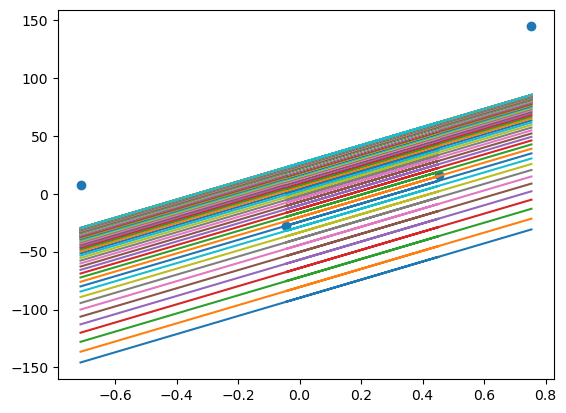

In [52]:
b = -100
m = 78.35
lr = 0.01

epochs = 100

for i in range(epochs):
    loss_slope = -2 * np.sum(y - m*X.ravel() - b)
    b = b - (lr * loss_slope)

    y_pred = m * X + b

    plt.plot(X,y_pred)

plt.scatter(X,y)

## GD FROM SCRATCH

In [53]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score

In [54]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

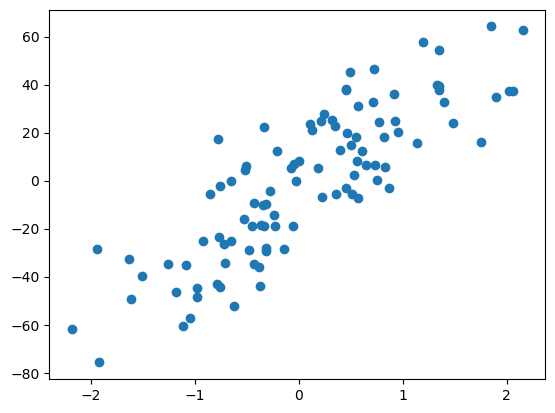

In [55]:
plt.scatter(X,y)

In [56]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [57]:
from sklearn.linear_model import LinearRegression

In [58]:
lr = LinearRegression()

In [59]:
lr.fit(X_train,y_train)
print(lr.coef_)
print(lr.intercept_)

[28.12597332]
-2.2710144261783825


In [60]:
y_pred = lr.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6345158782661012

In [61]:
class GDRegressor:
    
    def __init__(self,learning_rate,epochs):
        self.m = 100
        self.b = -120
        self.lr = learning_rate
        self.epochs = epochs
        
    def fit(self,X,y):
        # calcualte the b using GD
        for i in range(self.epochs):
            loss_slope_b = -2 * np.sum(y - self.m*X.ravel() - self.b)
            loss_slope_m = -2 * np.sum((y - self.m*X.ravel() - self.b)*X.ravel())
            
            self.b = self.b - (self.lr * loss_slope_b)
            self.m = self.m - (self.lr * loss_slope_m)
        print(self.m,self.b)
        
    def predict(self,X):
        return self.m * X + self.b
    

In [62]:
gd = GDRegressor(0.001,50)

In [63]:
gd.fit(X_train,y_train)

28.159367347119066 -2.3004574196824854


In [64]:
y_pred = gd.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6343842836315579